In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold


In [3]:
df = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [5]:
df.count()

fixed acidity           1143
volatile acidity        1143
citric acid             1143
residual sugar          1143
chlorides               1143
free sulfur dioxide     1143
total sulfur dioxide    1143
density                 1143
pH                      1143
sulphates               1143
alcohol                 1143
quality                 1143
Id                      1143
dtype: int64

In [6]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [7]:
df.shape

(1143, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.quality.value_counts().head()

quality
5    483
6    462
7    143
4     33
8     16
Name: count, dtype: int64

<Axes: title={'center': 'Quality of Wine'}, xlabel='quality'>

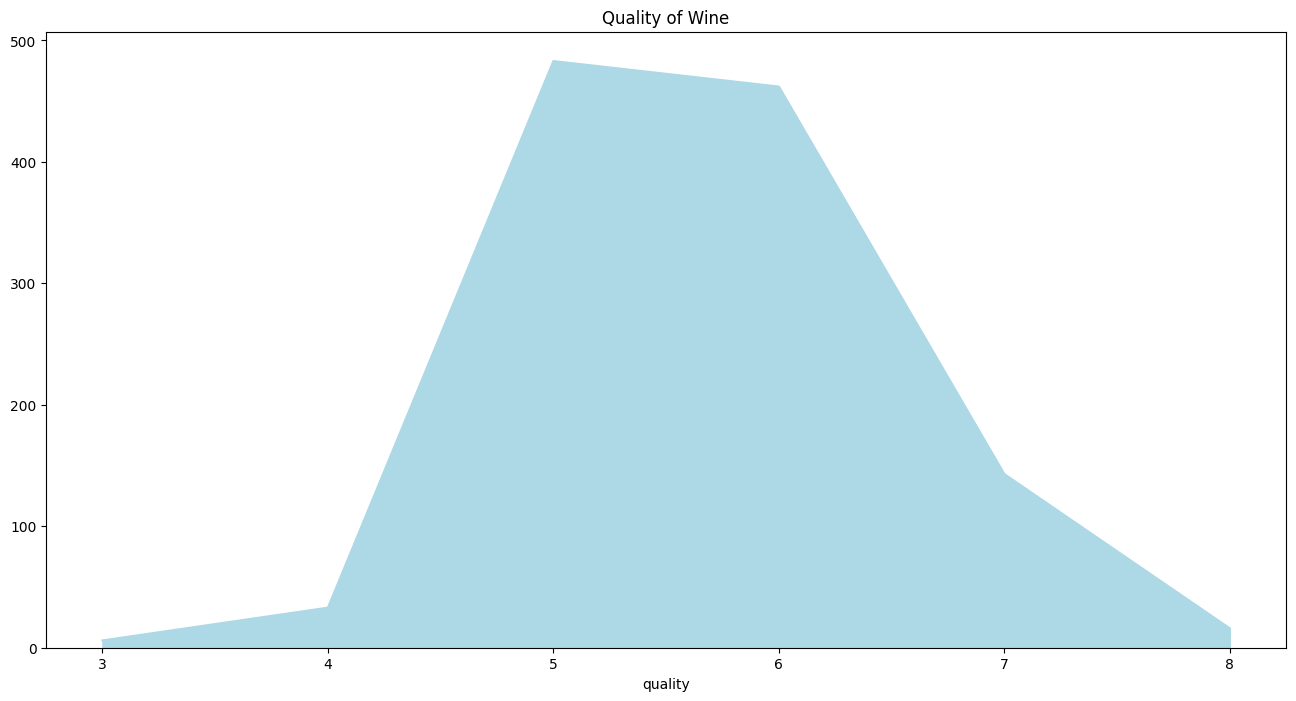

In [12]:
df['quality'].value_counts().sort_index().plot.area(figsize=(16,8),title='Quality of Wine',color='lightblue')

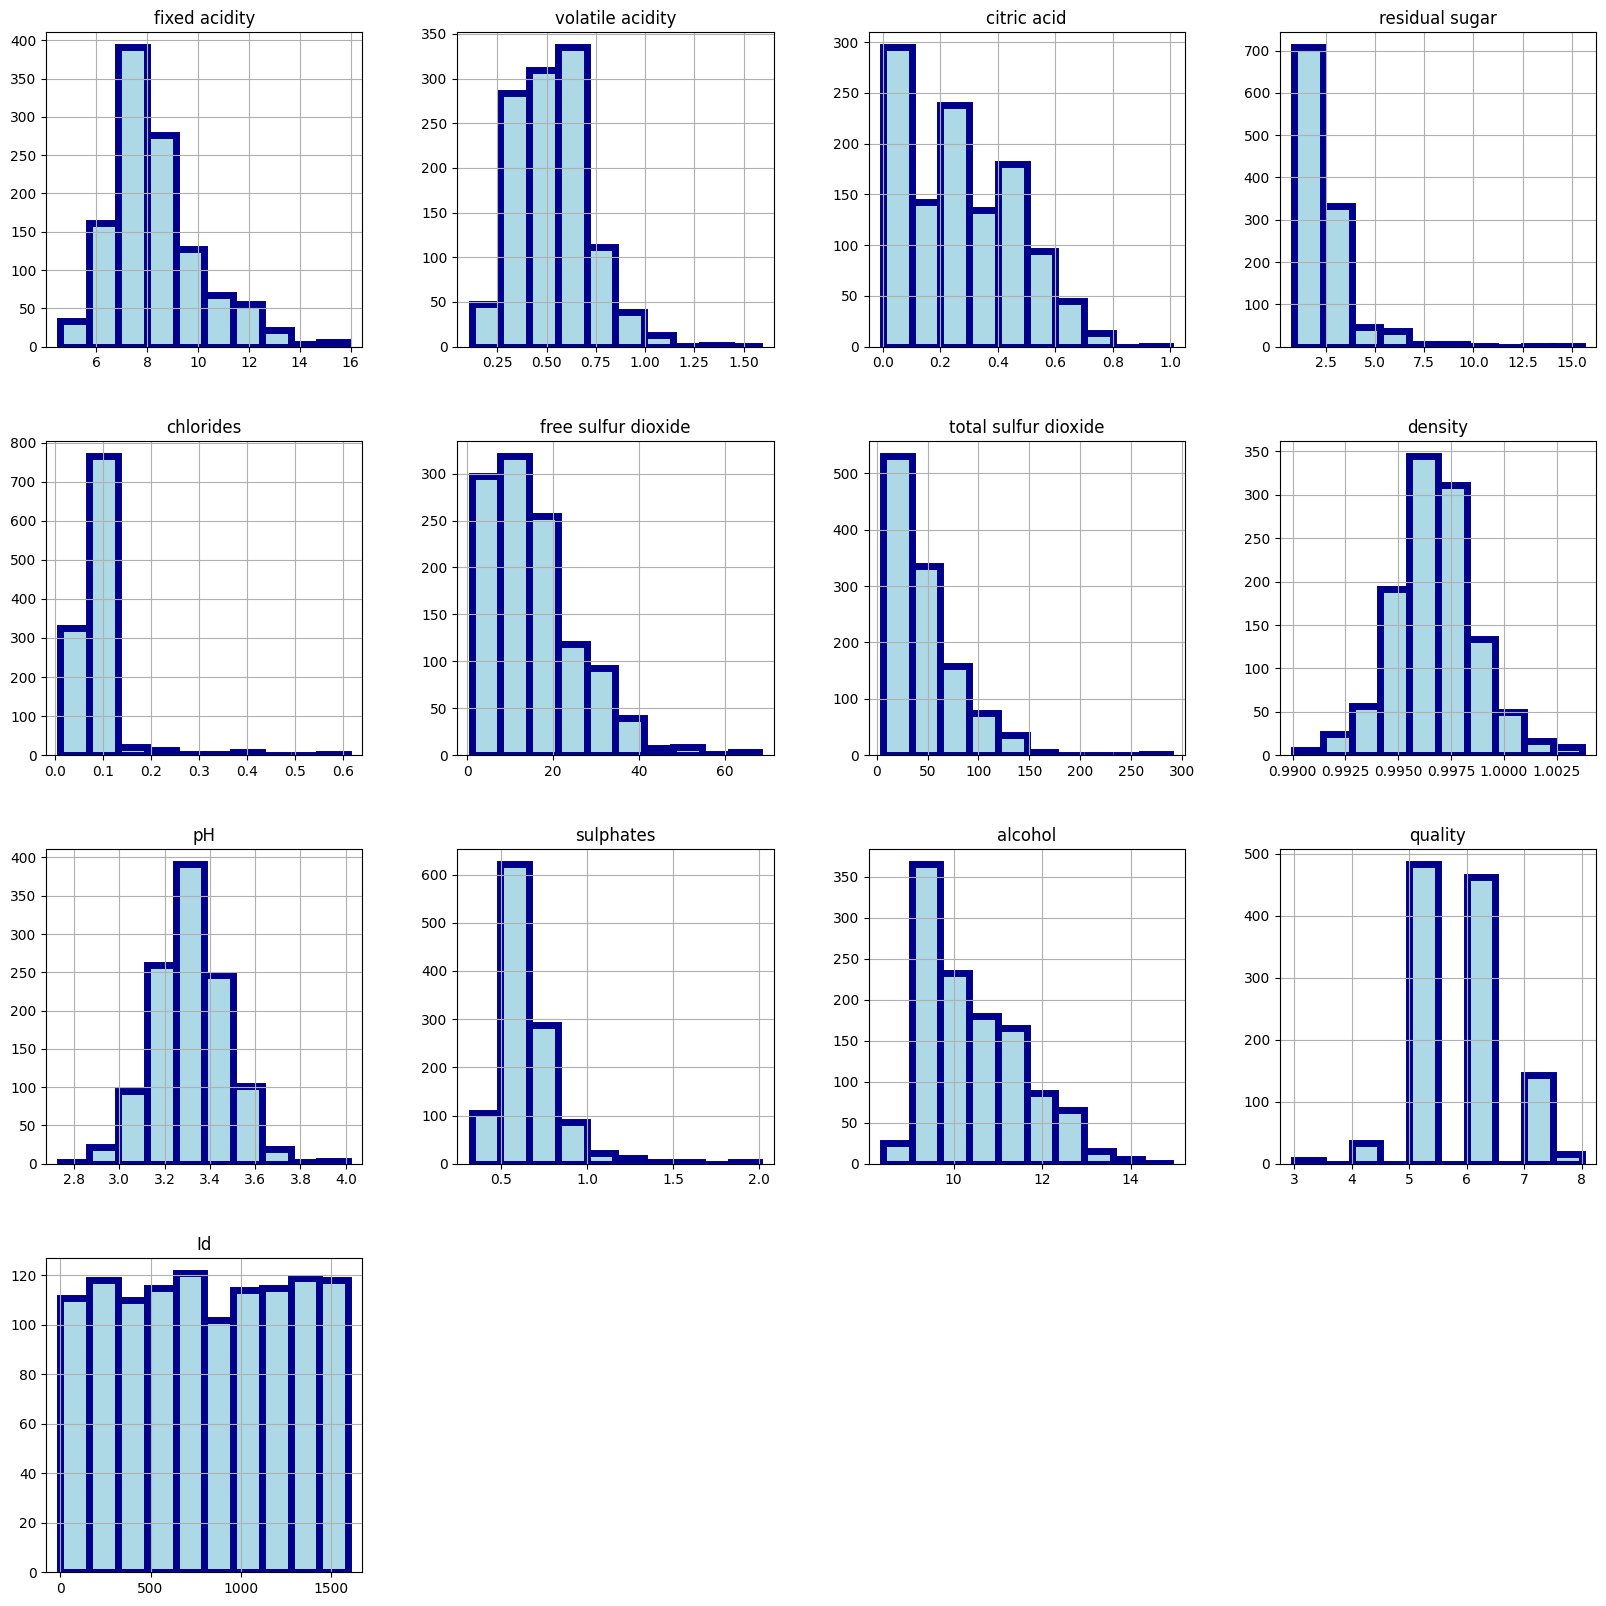

In [13]:
df.hist(figsize=(20,20),color = "lightblue", ec="darkblue", lw=5)
plt.show()

In [14]:
numeric_var=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']

In [15]:
df[numeric_var].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [16]:
sns.set_theme()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

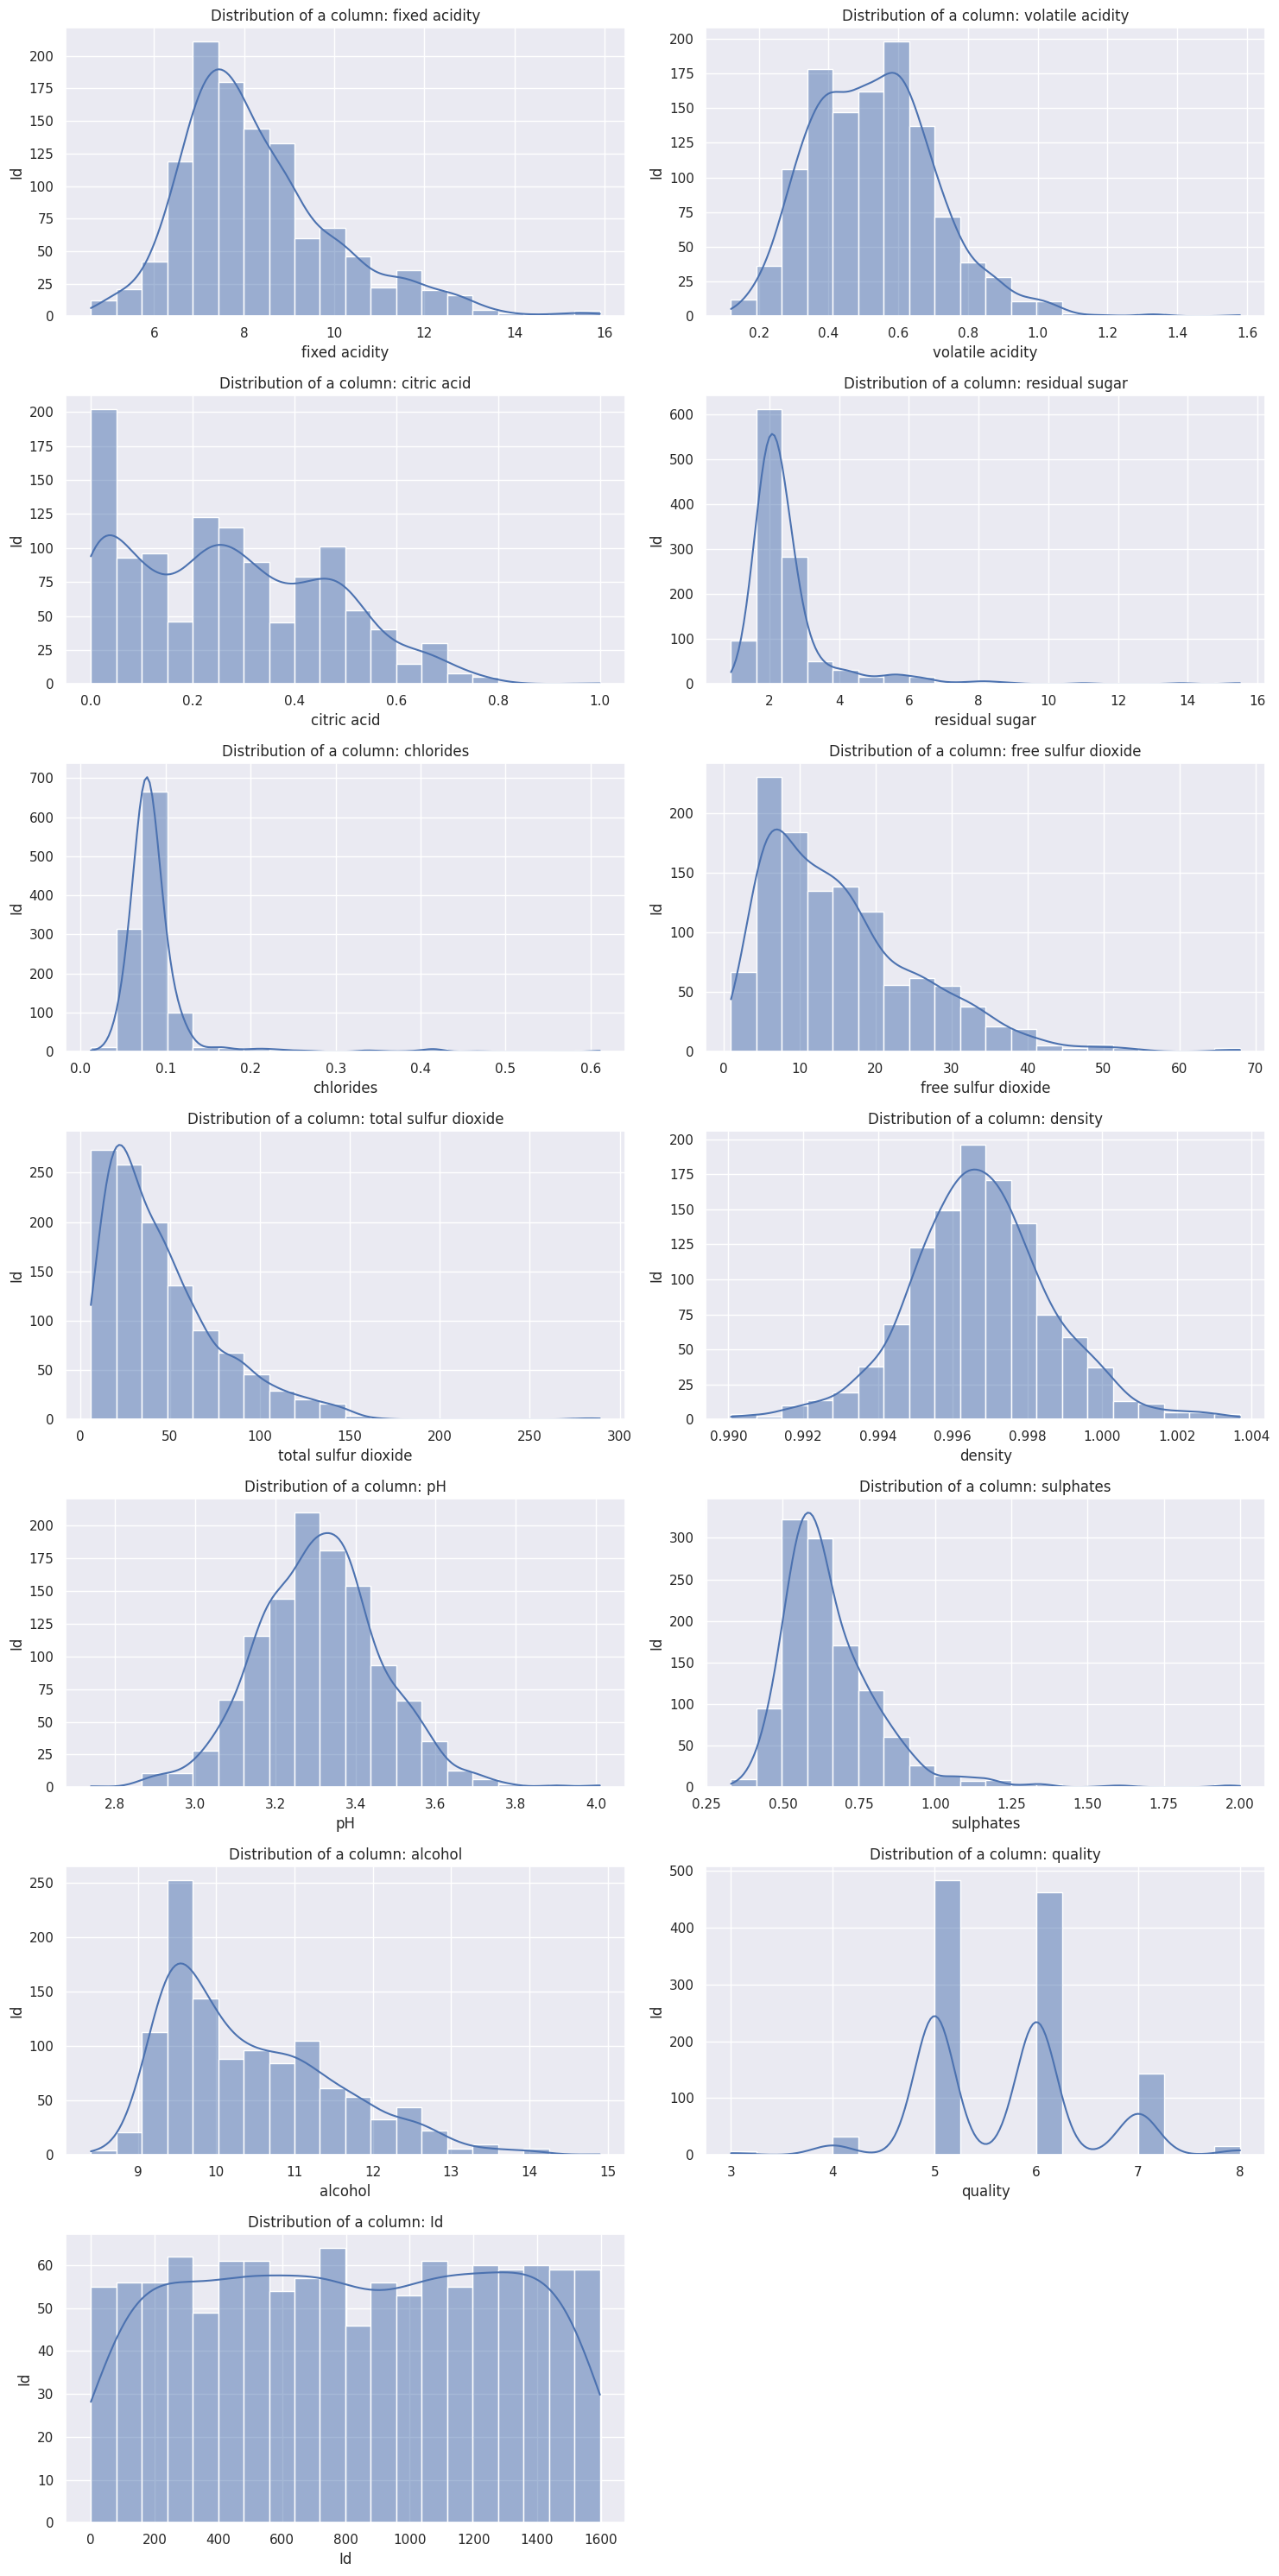

In [17]:
num_columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']
labels=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
axes = axes.flatten()
for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  
    axes[i].set_ylabel('Id')  
    axes[i].set_title(f'Distribution of a column: {column}')
    axes[-1].axis('off')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

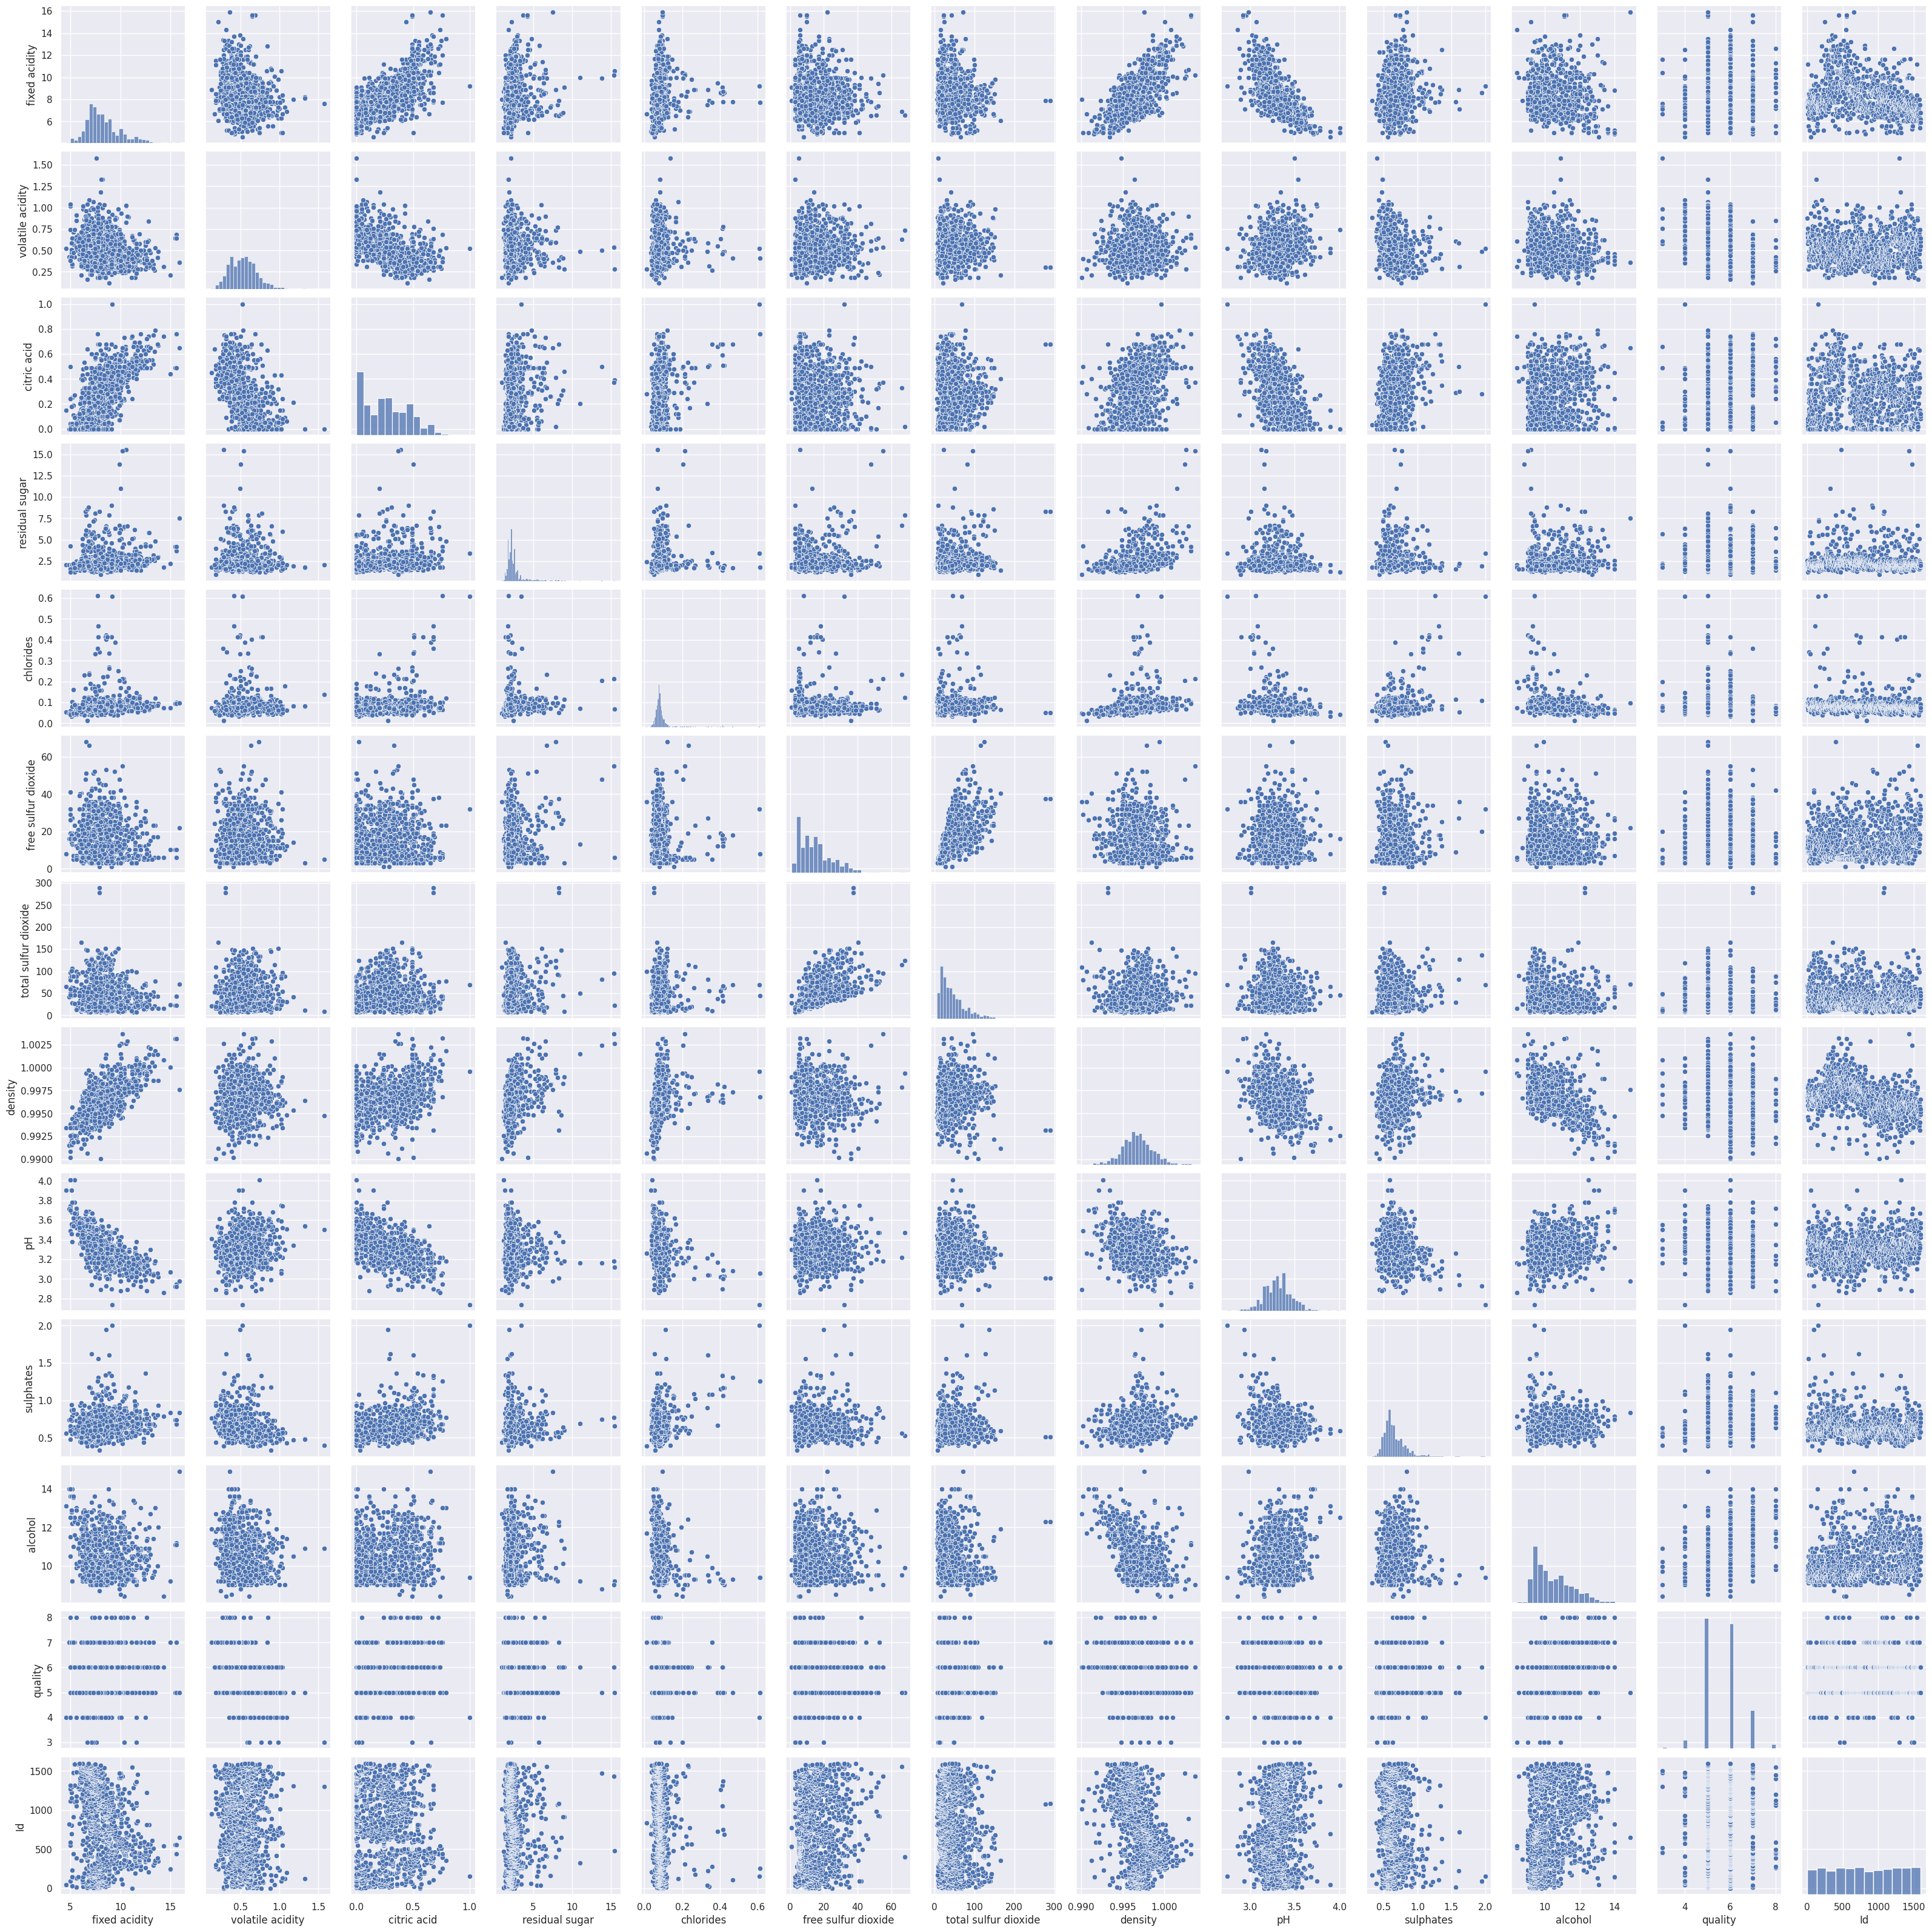

In [18]:
sns.pairplot(df)

<Axes: >

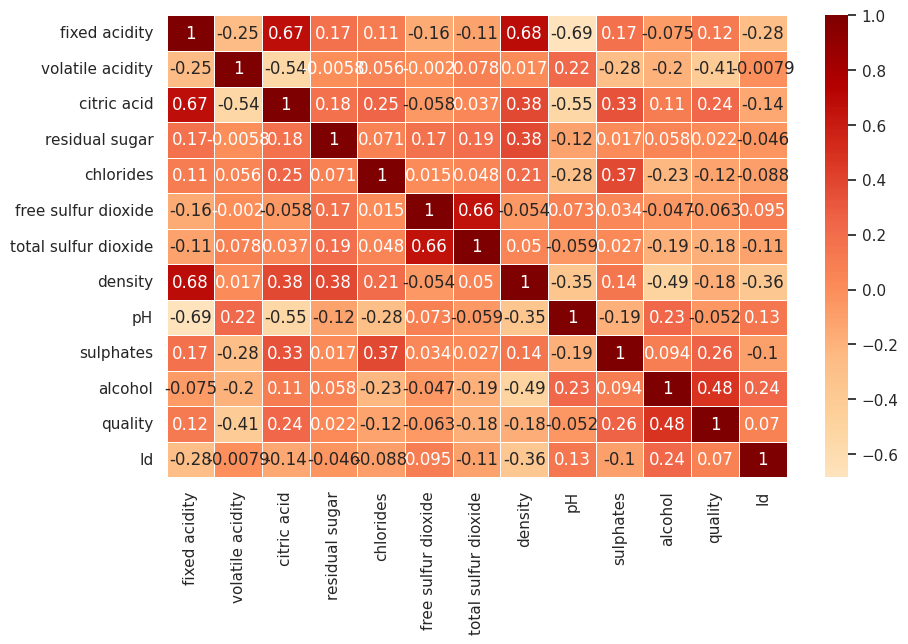

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,lw=.5,center=0,cmap="OrRd")

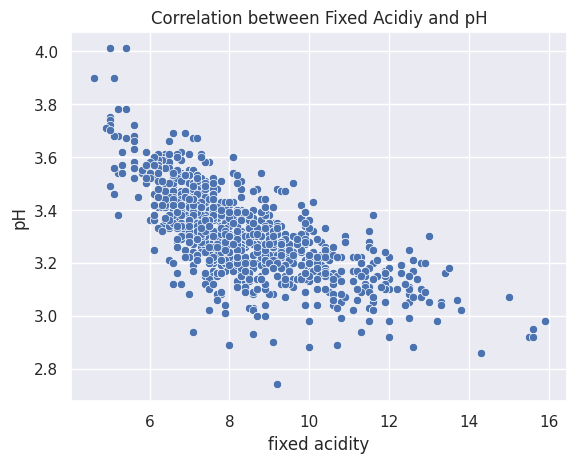

In [20]:
sns.scatterplot(x='fixed acidity', y='pH', data=df)
plt.title('Correlation between Fixed Acidiy and pH')
plt.show()

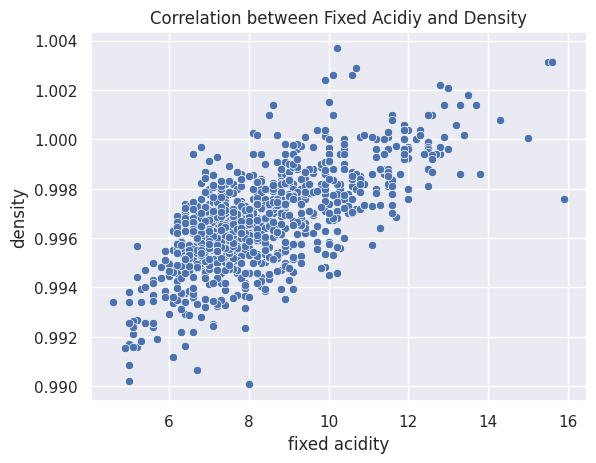

In [21]:
sns.scatterplot(x='fixed acidity', y='density', data=df)
plt.title('Correlation between Fixed Acidiy and Density')
plt.show()

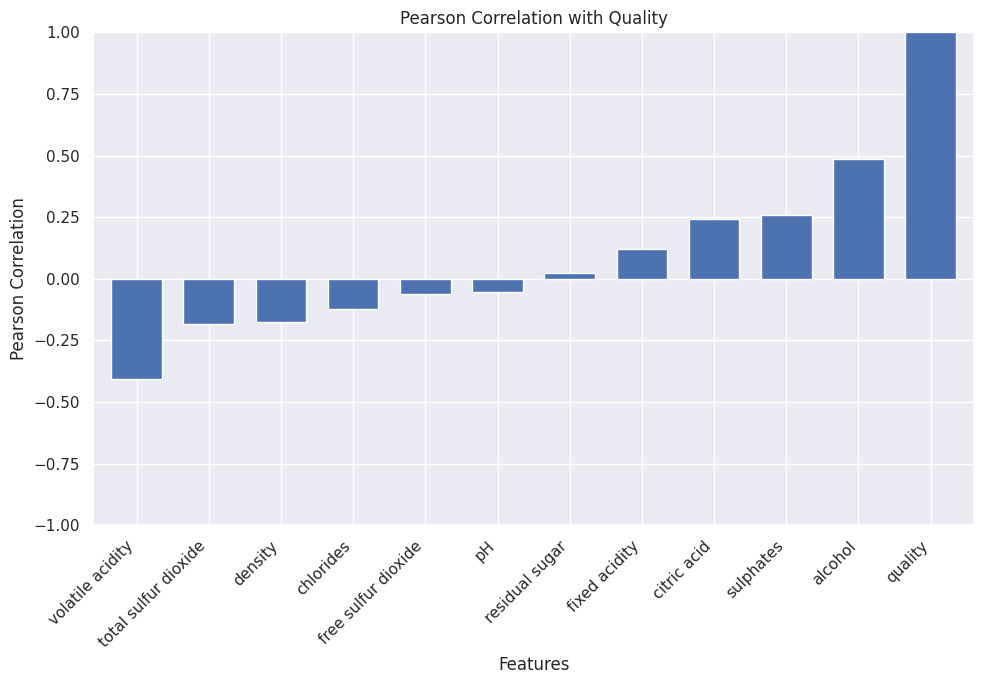

In [22]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['quality'][:-1].sort_values()

#Plotting
plt.figure(figsize=(10, 7))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Quality')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.617269544924154
Accuracy Score of Training Data is 0.5699300699300699



In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Training Data is {knn_acc}\n")

Accuracy Score of Training Data is 0.690781796966161
Accuracy Score of Training Data is 0.548951048951049



In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [31]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {svc_acc}\n")

Accuracy Score of Training Data is 0.7071178529754959
Accuracy Score of Training Data is 0.6153846153846154



In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Accuracy Score of Training Data is {dtc_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.5769230769230769



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Training Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.6643356643356644



In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [37]:
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.5804195804195804



In [38]:
grid_param = {
    'n_estimators' : [40, 50, 70, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'n_estimators': [40, 50, 70, 80, 100]},
             verbose=1)

In [39]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 10, 'n_estimators': 100}
0.5682714538283694


In [40]:
ada = AdaBoostClassifier(base_estimator = ada, algorithm = 'SAMME.R', learning_rate = 1, n_estimators = 100)
ada.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   learning_rate=1, n_estimators=100)

In [41]:
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Accuracy Score of Training Data is {ada_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Training Data is 0.5699300699300699



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.94049008168028
Accuracy Score of Training Data is 0.6188811188811189



In [44]:
sgb = GradientBoostingClassifier(subsample = 0.9, max_features = 0.8)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, subsample=0.9)

In [45]:
sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {sgb_acc}\n")

Accuracy Score of Training Data is 0.9544924154025671
Accuracy Score of Training Data is 0.6258741258741258



In [46]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost',
             'Gradient Boosting', 'SGB'],
    'Score' : [lr_acc, knn_acc, svc_acc, dtc_acc, rf_acc, ada_acc, gb_acc, sgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
4        Random Forest  0.664336
7                  SGB  0.625874
6    Gradient Boosting  0.618881
2                  SVC  0.615385
3        Decision Tree  0.576923
0  Logistic Regression  0.569930
5            Ada Boost  0.569930
1                  KNN  0.548951

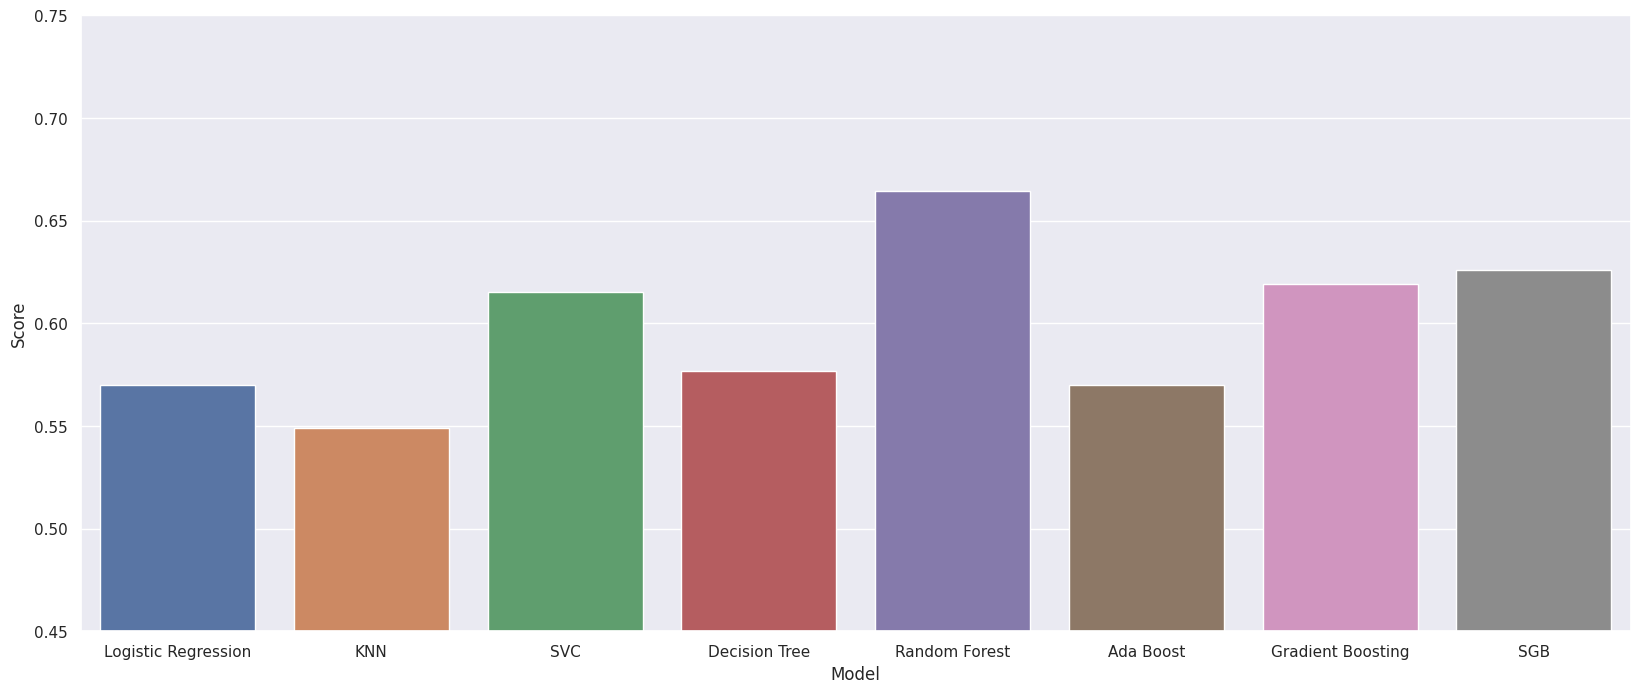

In [47]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.75)
plt.show()
